In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
cab = pd.read_csv('Datasets/Cab_Data.csv')
customer = pd.read_csv('Datasets/Customer_ID.csv')
transaction = pd.read_csv('Datasets/Transaction_ID.csv')
city = pd.read_csv('Datasets/City.csv')

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


## Data Merging
##### We can merge cab,transaction and city in a single dataframe abd keep city as a another dataframe

In [7]:
tran_cust = pd.merge(customer,transaction, left_on = 'Customer ID', right_on= 'Customer ID')
main_df = pd.merge(tran_cust,cab, left_on='Transaction ID', right_on='Transaction ID')

In [8]:
main_df = round(main_df,2)
main_df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12


In [9]:
columns = main_df.columns.to_list()
columns

['Customer ID',
 'Gender',
 'Age',
 'Income (USD/Month)',
 'Transaction ID',
 'Payment_Mode',
 'Date of Travel',
 'Company',
 'City',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip']

In [10]:
main_df.drop(['Transaction ID'],axis=1,inplace=True)
main_df.rename(columns={'Date of Travel' : 'Date','Income (USD/Month)' :'Income'},inplace=True)
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12


In [11]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


##### So, I have two Dataframes one containing all the information about Cab transactions and other is about Grographical information of the city.

## Prelimnary Data Analysis

In [12]:
print('The shape of Cab transaction dataframe is', main_df.shape )
print('The shape of Geographical information of city dataframe is', city.shape )

The shape of Cab transaction dataframe is (359392, 11)
The shape of Geographical information of city dataframe is (20, 3)


In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Customer ID    359392 non-null  int64  
 1   Gender         359392 non-null  object 
 2   Age            359392 non-null  int64  
 3   Income         359392 non-null  int64  
 4   Payment_Mode   359392 non-null  object 
 5   Date           359392 non-null  object 
 6   Company        359392 non-null  object 
 7   City           359392 non-null  object 
 8   KM Travelled   359392 non-null  float64
 9   Price Charged  359392 non-null  float64
 10  Cost of Trip   359392 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 32.9+ MB


In [14]:
main_df.describe()

,Customer ID,Age,Income,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190115
std,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993664
min,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.680000
max,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000


In [15]:
main_df.isnull().sum()

Customer ID      0
Gender           0
Age              0
Income           0
Payment_Mode     0
Date             0
Company          0
City             0
KM Travelled     0
Price Charged    0
Cost of Trip     0
dtype: int64

In [16]:
main_df.duplicated().sum()

0

In [17]:
main_df.nunique(axis=0)

Customer ID      46148
Gender               2
Age                 48
Income           22725
Payment_Mode         2
Date              1095
Company              2
City                19
KM Travelled       874
Price Charged    99176
Cost of Trip     14741
dtype: int64

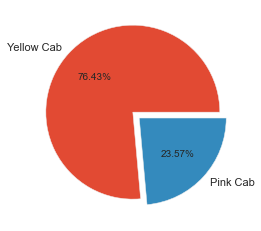

In [18]:
plt.pie(main_df['Company'].value_counts(),labels = main_df['Company'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

In [19]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [20]:
print(" Checking Null Vlaues for City")
print(city.isnull().sum())
print("\n\n Checking Duplicated Vlaues for City")
print(city.duplicated().sum())

 Checking Null Vlaues for City
City          0
Population    0
Users         0
dtype: int64


 Checking Duplicated Vlaues for City
0


In [21]:
city['Population'] = city.Population.str.replace(',', '').astype(int)
city['Users'] = city.Users.str.replace(',', '').astype(int)
city['percentage_user'] = round((city.Users/city.Population) * 100,2)

In [22]:
city.sort_values('percentage_user',ascending=False).head(10)

,City,Population,Users,percentage_user
14,SAN FRANCISCO CA,629591,213609,33.93
19,BOSTON MA,248968,80021,32.14
17,WASHINGTON DC,418859,127001,30.32
2,LOS ANGELES CA,1595037,144132,9.04
1,CHICAGO IL,1955130,164468,8.41
6,SAN DIEGO CA,959307,69995,7.30
12,SEATTLE WA,671238,25063,3.73
0,NEW YORK NY,8405837,302149,3.59
9,ATLANTA GA,814885,24701,3.03
18,NASHVILLE TN,327225,9270,2.83


##### San Francisco, Boston and Washington have the most percentage of users.

In [23]:
main_df['Price_per_km'] =  round(main_df['Cost of Trip'] / main_df['KM Travelled'],2)
main_df['day'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.day_name()
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday


In [24]:
monthyear_list=[]
x = main_df['Date'].str.split('/')
for i in x:
    monthyear_list.append(i[1]+'-'+i[2])


In [25]:
main_df['month'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.month_name()
main_df['year'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.year
main_df['month-year'] = monthyear_list
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018


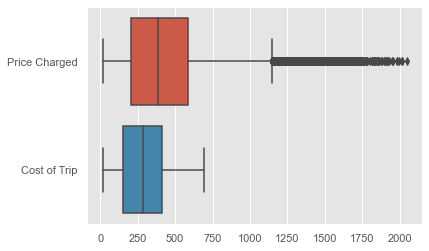

In [26]:

sns.boxplot(data = main_df[['Price Charged','Cost of Trip']], orient="h")
plt.show()

In [27]:
main_df['diff_charge_costoftrip'] = main_df['Price Charged'] -  main_df['Cost of Trip']
main_df.sort_values('diff_charge_costoftrip',ascending=False).head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip
96554,1126,Male,18,8825,Cash,05/05/2017,Yellow Cab,NEW YORK NY,46.80,2048.03,584.06,12.48,Friday,May,2017,05-2017,1463.97
12320,2041,Male,37,34732,Card,05/05/2017,Yellow Cab,NEW YORK NY,43.29,2016.70,571.43,13.20,Friday,May,2017,05-2017,1445.27
64435,1541,Female,64,27425,Cash,30/04/2017,Yellow Cab,NEW YORK NY,43.20,2013.95,580.61,13.44,Sunday,April,2017,04-2017,1433.34
250571,1372,Female,37,5574,Card,30/04/2017,Yellow Cab,NEW YORK NY,41.81,1981.05,556.91,13.32,Sunday,April,2017,04-2017,1424.14
20317,207,Male,25,11149,Cash,30/04/2017,Yellow Cab,NEW YORK NY,41.65,1918.14,509.80,12.24,Sunday,April,2017,04-2017,1408.34


#### Before jumping into any conclusion let's see wether holiday has any impact on pricing or demand

In [28]:
holiday = pd.read_csv('Datasets/Holiday.csv')
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     57 non-null     object
 1   Holiday  57 non-null     object
 2   WeekDay  57 non-null     object
 3   Month    57 non-null     int64 
 4   Day      57 non-null     int64 
 5   Year     57 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.8+ KB


In [29]:
main_df['holiday'] = main_df.Date.isin(holiday.Date)
main_df.holiday = main_df.holiday.astype(int)

In [30]:
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016,57.31,0
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018,281.28,0
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018,194.65,0
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016,23.67,0
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018,253.98,0


In [31]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekends = ['Friday','Saturday','Sunday']
last_quarter=['October','November','December']

In [32]:
#Setting a color palette
colors = {'Pink Cab':'#f820De','Yellow Cab':'#ffc000'}

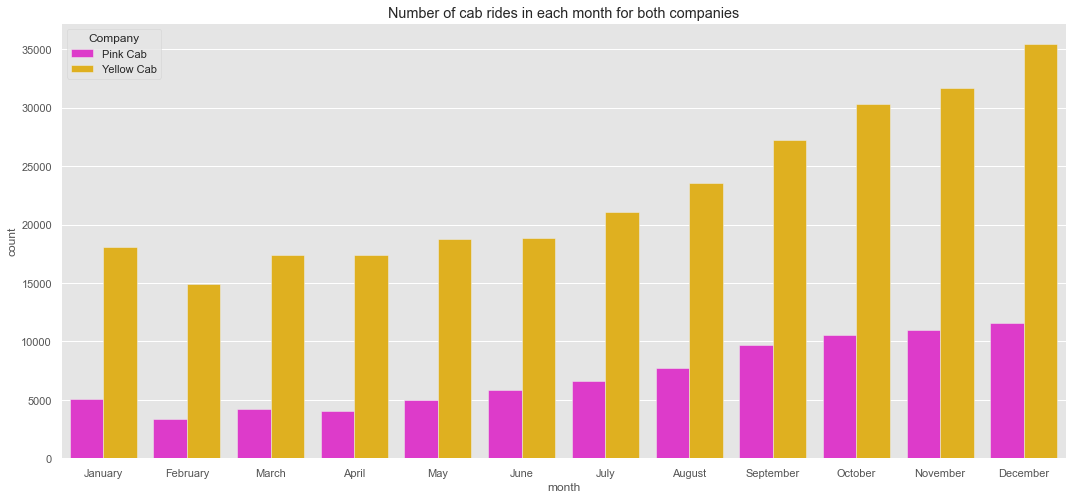

In [33]:
plt.figure(figsize=(18,8))
plt.title('Number of cab rides in each month for both companies')
sns.countplot(x='month',data=main_df,hue='Company',order=months,palette=colors)
plt.show()

In [34]:
PinkCab = main_df[main_df['Company']=='Pink Cab']
YellowCab = main_df[main_df['Company']=='Yellow Cab']

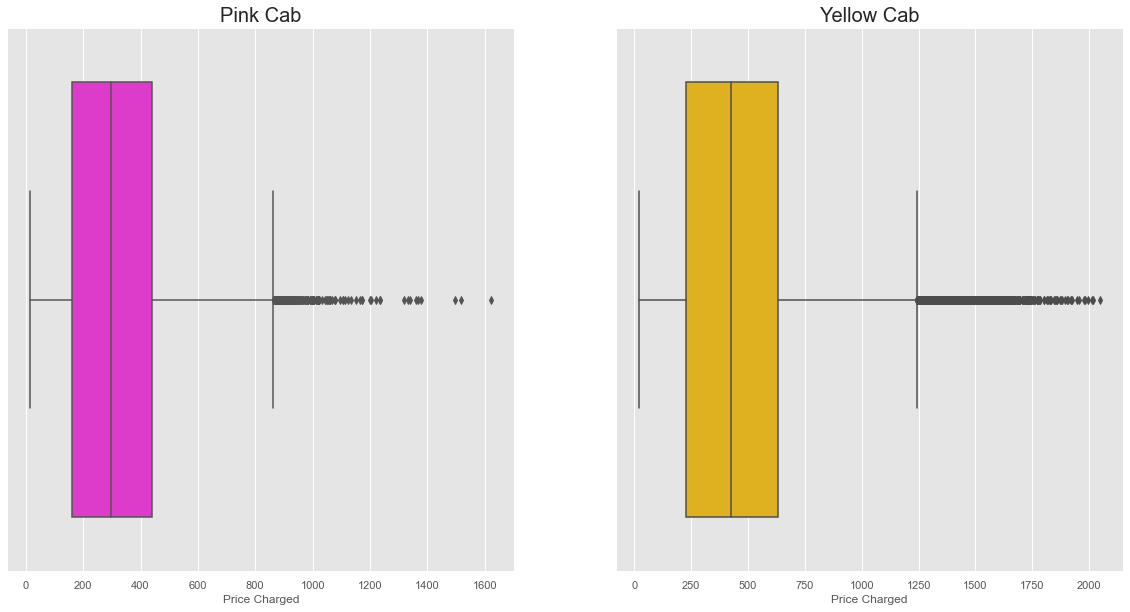

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(PinkCab['Price Charged'], ax=ax1,color=colors['Pink Cab'])
ax1.set_title('Pink Cab', fontsize=20)

sns.boxplot(YellowCab['Price Charged'], ax=ax2,color=colors['Yellow Cab'])
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

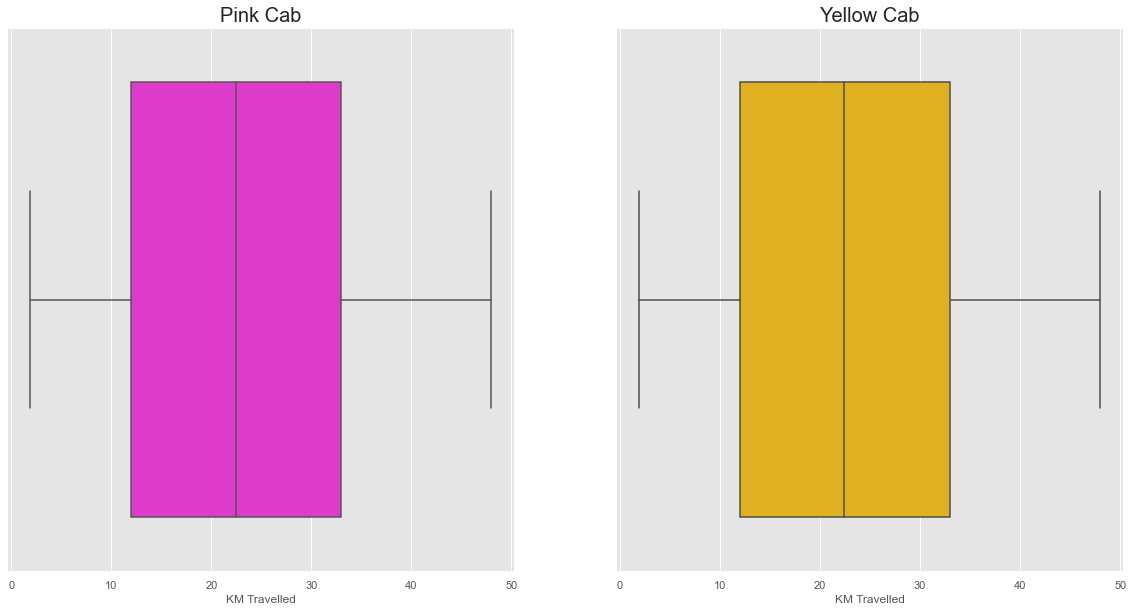

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(PinkCab['KM Travelled'], ax=ax1,color=colors['Pink Cab'])
ax1.set_title('Pink Cab', fontsize=20)

sns.boxplot(YellowCab['KM Travelled'], ax=ax2,color=colors['Yellow Cab'])
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

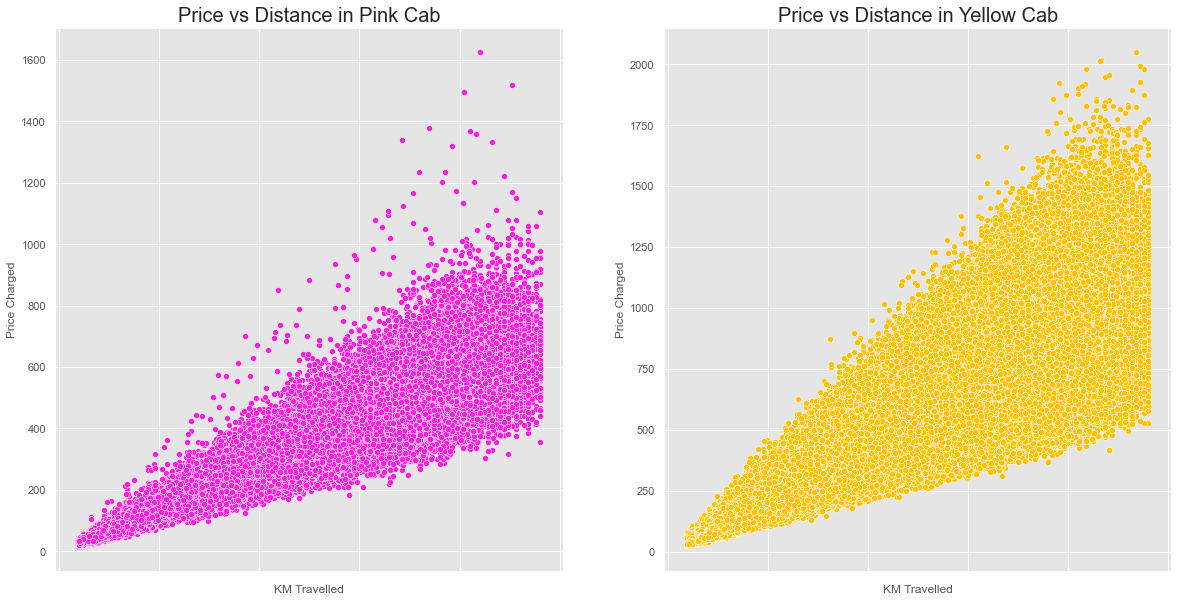

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.scatterplot(PinkCab['KM Travelled'], PinkCab['Price Charged'], ax=ax1,color=colors['Pink Cab'])
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(YellowCab['KM Travelled'], YellowCab['Price Charged'], ax=ax2,color=colors['Yellow Cab'])
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

<AxesSubplot:title={'center':'Number of cab rides in each month for both companies'}, xlabel='month', ylabel='count'>

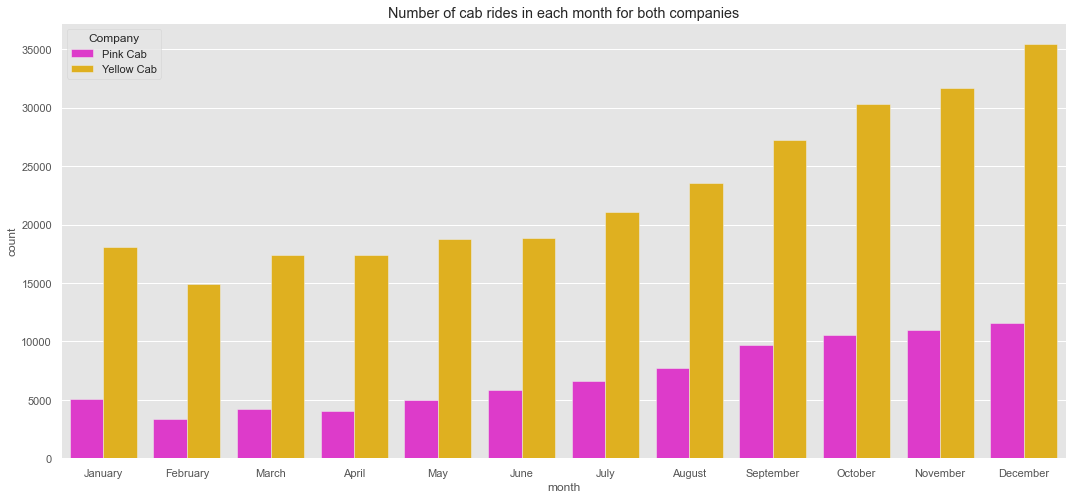

In [38]:
plt.figure(figsize=(18,8))
plt.title('Number of cab rides in each month for both companies')
sns.countplot(x='month',data=main_df,hue='Company',order=months,palette=colors)

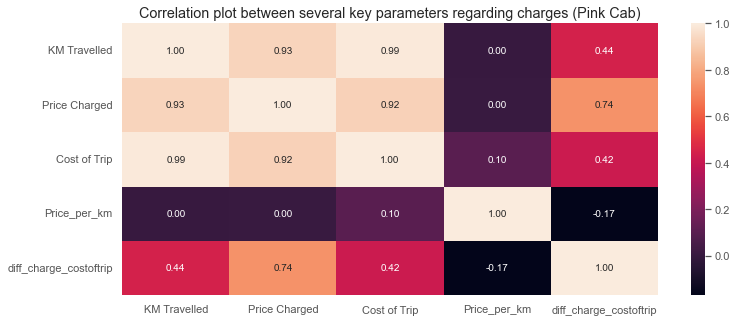

In [39]:
plt.figure(figsize=(12,5))
plt.title('Correlation plot between several key parameters regarding charges (Pink Cab)')
sns.heatmap(main_df[main_df['Company'] == 'Pink Cab'][['KM Travelled', 'Price Charged', 'Cost of Trip','Price_per_km','diff_charge_costoftrip']].corr(), annot=True,fmt='.2f')
plt.show()


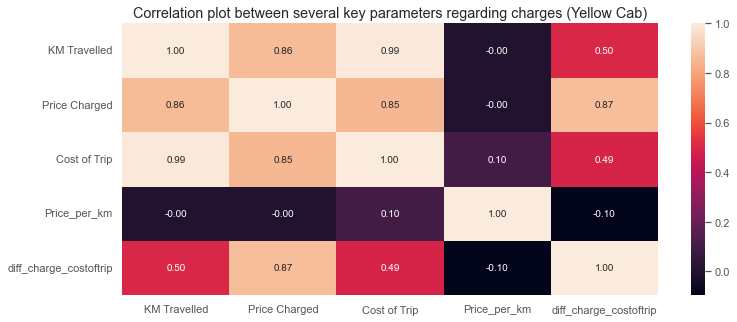

In [40]:
plt.figure(figsize=(12,5))
plt.title('Correlation plot between several key parameters regarding charges (Yellow Cab)')
sns.heatmap(main_df[main_df['Company'] == 'Yellow Cab'][['KM Travelled', 'Price Charged', 'Cost of Trip','Price_per_km','diff_charge_costoftrip']].corr(), annot=True,fmt='.2f')
plt.show()



In [41]:
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
main_df['age_range'] = pd.cut(main_df.Age, bins, labels = labels,include_lowest = True)
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016,57.31,0,20-29
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018,281.28,0,20-29
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018,194.65,0,20-29
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016,23.67,0,20-29
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018,253.98,0,20-29


<AxesSubplot:title={'center':'Number of cab rides in each age range for both companies'}, xlabel='age_range', ylabel='count'>

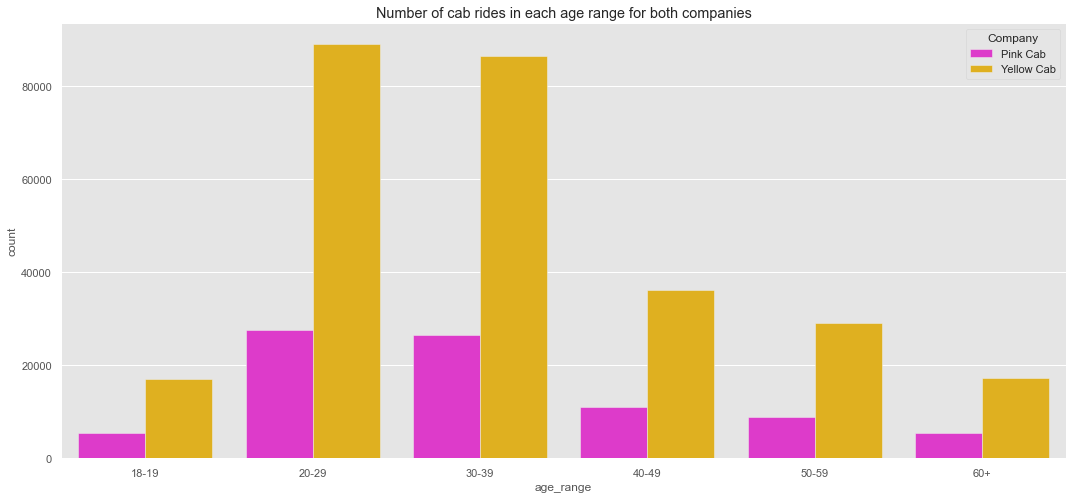

In [42]:
plt.figure(figsize=(18,8))
plt.title('Number of cab rides in each age range for both companies')
sns.countplot(x='age_range',data=main_df,hue='Company',palette=colors)

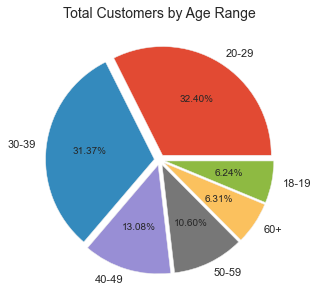

In [43]:
plt.figure(figsize=(5,5))
plt.pie(main_df['age_range'].value_counts(),labels = main_df['age_range'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*6)
plt.title("Total Customers by Age Range", fontsize=14)
plt.show()

In [44]:
main_df['dist_category'] = pd.cut(main_df['KM Travelled'],bins=[main_df['KM Travelled'].min(),10,25,main_df['KM Travelled'].max()],labels=['Small Trip','Medium Trip','Long Trip'])
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range,dist_category
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016,57.31,0,20-29,Long Trip
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018,281.28,0,20-29,Long Trip
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018,194.65,0,20-29,Long Trip
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016,23.67,0,20-29,Long Trip
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018,253.98,0,20-29,Long Trip


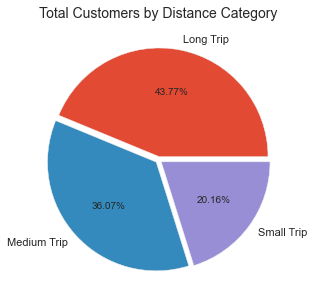

In [45]:
plt.figure(figsize=(5,5))
plt.pie(main_df['dist_category'].value_counts(),labels = main_df['dist_category'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.03]*3)
plt.title("Total Customers by Distance Category", fontsize=14)
plt.show()

In [46]:
main_df['income_cat'] = pd.cut(main_df['Income'],bins=[1006,3955,12235,main_df['Income'].max()],labels=['Lower-Middle','Upper-Middle','High'])
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range,dist_category,income_cat
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016,57.31,0,20-29,Long Trip,Upper-Middle
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018,281.28,0,20-29,Long Trip,Upper-Middle
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018,194.65,0,20-29,Long Trip,Upper-Middle
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016,23.67,0,20-29,Long Trip,Upper-Middle
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018,253.98,0,20-29,Long Trip,Upper-Middle


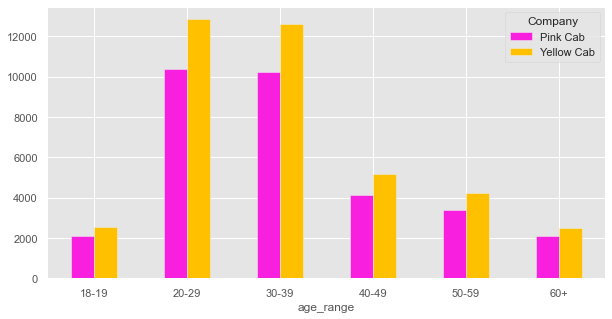

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
ax = main_df.groupby(['age_range', 'Company'])['Customer ID'].nunique().unstack().plot.bar(ax=ax,color=colors)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

### Price Comparison

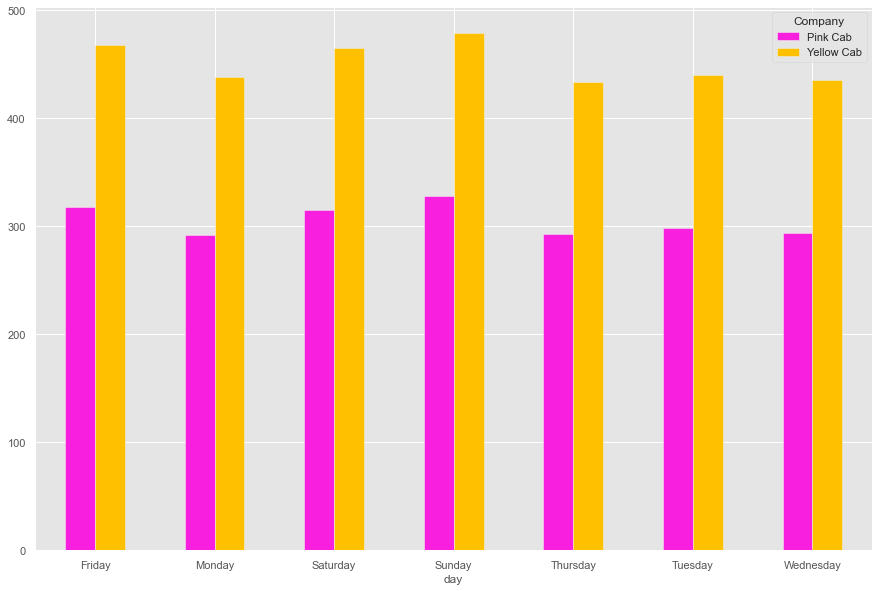

In [48]:
fig, ax = plt.subplots(figsize=(15,10))
round(main_df.groupby(['day','Company'])['Price Charged'].mean().unstack(),2).plot.bar(ax=ax,color=colors)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()


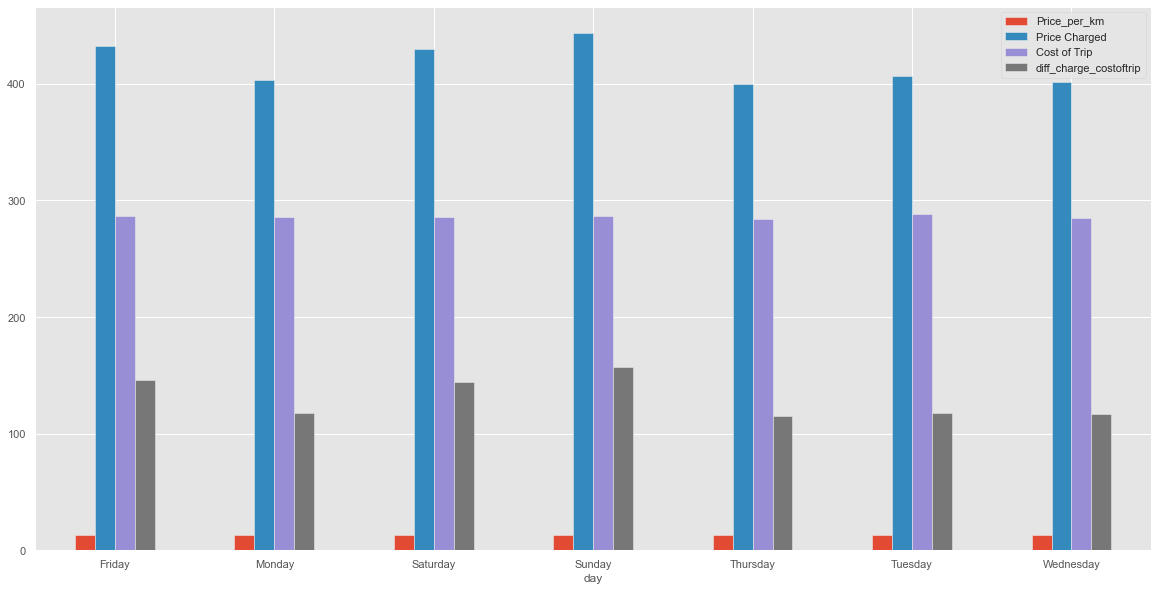

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
ax =round(main_df.set_index('day').loc[days].groupby(['day'])['Price_per_km','Price Charged','Cost of Trip','diff_charge_costoftrip'].mean(),2).plot.bar(ax=ax)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

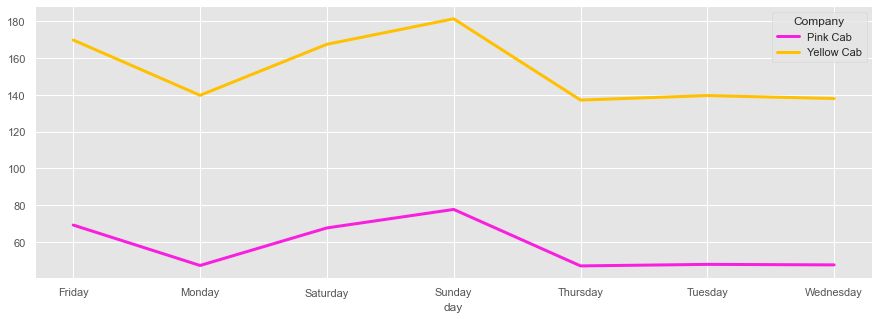

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
main_df.groupby(['day', 'Company'])['diff_charge_costoftrip'].mean().unstack().plot.line(ax=ax,color=colors,linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

## City

In [51]:
main_df[main_df['City'] =='SAN FRANCISCO CA']

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range,dist_category,income_cat


In [52]:
city.drop(city[city['City'] ==  'SAN FRANCISCO CA'].index,inplace=True)

In [53]:
city.sort_values('City',inplace=True)
city.reset_index(inplace=True)
city.drop('index',axis=1,inplace=True)

YellowCab.drop_duplicates(['Customer ID'],inplace=True)
PinkCab.drop_duplicates(['Customer ID'],inplace=True)

In [54]:
city['yellow_users'] = pd.DataFrame(YellowCab.groupby('City')['Customer ID'].nunique()).reset_index()['Customer ID']
city['pink_users'] = pd.DataFrame(PinkCab.groupby('City')['Customer ID'].nunique()).reset_index()['Customer ID']
city['%yellow_cab'] = round((city['yellow_users'] / city['Users'])*100,2)
city['%pink_cab'] = round((city['pink_users'] / city['Users'])*100,2)

In [55]:
yellow_profit, pink_profit = [],[]
for  cities in city.City.unique():
    yellow_profit.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['City']==cities)]['diff_charge_costoftrip'].sum())
    pink_profit.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['City']==cities)]['diff_charge_costoftrip'].sum())
city['yellow_profit'] = yellow_profit
city['pink_profit'] =  pink_profit 

In [56]:
city.head()

,City,Population,Users,percentage_user,yellow_users,pink_users,%yellow_cab,%pink_cab,yellow_profit,pink_profit
0,ATLANTA GA,814885,24701,3.03,2595,1322,10.51,5.35,746382.57,96050.10
1,AUSTIN TX,698371,14978,2.14,1914,1354,12.78,9.04,379255.77,147445.08
2,BOSTON MA,248968,80021,32.14,2997,2463,3.75,3.08,1506717.26,262001.57
3,CHICAGO IL,1955130,164468,8.41,3000,2859,1.82,1.74,3068590.79,318722.42
4,DALLAS TX,942908,22157,2.35,2564,1118,11.57,5.05,1104003.21,24730.14


In [57]:
df_melt = pd.melt(city, id_vars=['City','Population','percentage_user','Users','yellow_users','pink_users','yellow_profit', 'pink_profit'], var_name='variable', value_name='value')
df_melt.variable.unique()

array(['%yellow_cab', '%pink_cab'], dtype=object)

Text(0, 0.5, 'Percentage of users compared to total')

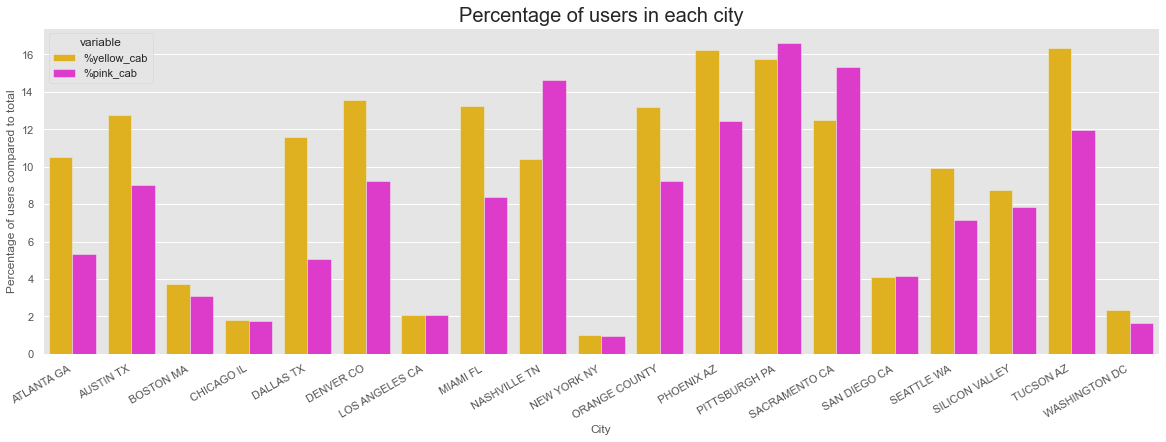

In [58]:
# Percentage of users compared to total users
plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_melt, x="City", y='value', hue='variable',palette={'%pink_cab':'#f820De','%yellow_cab':'#ffc000'})
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
plt.title("Percentage of users in each city", size=20)
plt.ylabel("Percentage of users compared to total")

In [59]:
print('Average user base covered by Yellow Cab:',round(city['%yellow_cab'].mean(),2),'%')
print('Average user base covered by Pink Cab:',round(city['%pink_cab'].mean(),2),'%')

Average user base covered by Yellow Cab: 9.46 %
Average user base covered by Pink Cab: 7.68 %


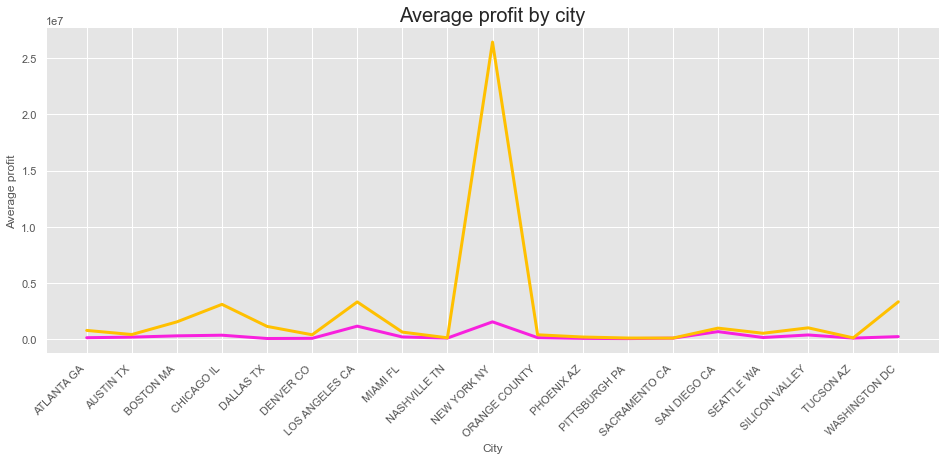

In [60]:
plt.figure(figsize=(16,6))

ax = sns.lineplot(data=city, x='City', y='pink_profit', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

sns.lineplot(data=city, x='City', y='yellow_profit', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Average profit')
plt.title('Average profit by city', size=20)
plt.show()

Observations:
Except Boston and Washington, less than 10% of the population uses cabs.
Pink Cab has more users than Yellow Cab in only four cities.
Out of the total cab users, Yellow Cab covers 9.46% while Pink Cab covers 7.68% of the market.

## Revenue

In [61]:
year_df = pd.DataFrame()
year_df['year'] =  [2016,2017,2018]
yellow_users, pink_users=[],[]
yellow_revenue, pink_revenue = [],[]
yellow_profit,pink_profit = [],[]
for year in year_df['year']:
    yellow_users.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['year']==year)]['Customer ID'].count())
    pink_users.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['year']==year)]['Customer ID'].count())
    yellow_revenue.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['year']==year)]['Price Charged'].sum())
    pink_revenue.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['year']==year)]['Price Charged'].sum())
    yellow_profit.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['year']==year)]['diff_charge_costoftrip'].sum())
    pink_profit.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['year']==year)]['diff_charge_costoftrip'].sum())
year_df['yellow_customers'] = yellow_users
year_df['pink_customers'] = pink_users
year_df['yellow_revenue'] = yellow_revenue
year_df['pink_revenue'] = pink_revenue
year_df['yellow_profit'] = yellow_profit
year_df['pink_profit'] = pink_profit
year_df['year'] = year_df['year'].astype(object)
year_df

,year,yellow_customers,pink_customers,yellow_revenue,pink_revenue,yellow_profit,pink_profit
0,2016,82239,25080,38481133.18,7908479.23,13926996.40,1713511.24
1,2017,98189,30321,45818910.04,9578629.54,16575977.40,2033655.03
2,2018,94253,29310,41553843.97,8841142.56,13517398.79,1560161.92


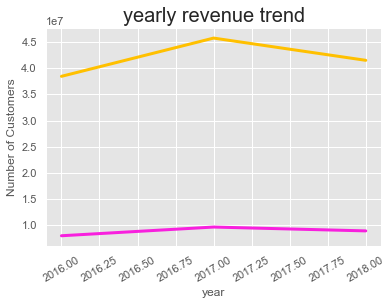

In [62]:
ax = sns.lineplot(data=year_df, x='year', y='pink_revenue', color=colors['Pink Cab'],linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
sns.lineplot(data=year_df, x='year', y='yellow_revenue', color=colors['Yellow Cab'],linewidth=3)
plt.ylabel('Number of Customers')
plt.title('yearly revenue trend',size=20)
plt.show()

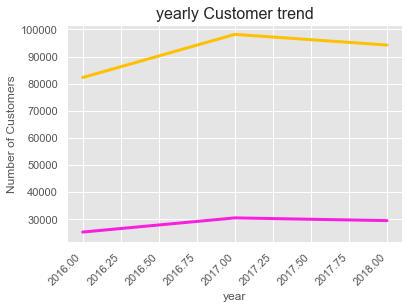

In [63]:
ax = sns.lineplot(data=year_df, x='year', y='pink_customers', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
sns.lineplot(data=year_df, x='year', y='yellow_customers', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Number of Customers')
plt.title('yearly Customer trend', size=16)
plt.show()

In [64]:
per_month_df = pd.DataFrame() 
per_month_df['month-year'] = ['01-2016','02-2016', '03-2016', '04-2016', '05-2016', '06-2016', '07-2016',
       '08-2016', '09-2016', '10-2016', '11-2016', '12-2016', 
       '01-2017', '02-2017', '03-2017', '04-2017', '05-2017', '06-2017',
       '07-2017', '08-2017', '09-2017', '10-2017', '11-2017', '12-2017',
       '01-2018', '02-2018', '03-2018', '04-2018', '05-2018', '06-2018',
       '07-2018', '08-2018', '09-2018', '10-2018', '11-2018', '12-2018']

In [65]:
yellow_users, pink_users=[],[]
yellow_revenue, pink_revenue = [],[]
yellow_profit,pink_profit = [],[]
for month in per_month_df['month-year']:
    yellow_users.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['month-year']==month)]['Customer ID'].count())
    pink_users.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['month-year']==month)]['Customer ID'].count())
    yellow_revenue.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['month-year']==month)]['Price Charged'].sum())
    pink_revenue.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['month-year']==month)]['Price Charged'].sum())
    yellow_profit.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['month-year']==month)]['diff_charge_costoftrip'].sum())
    pink_profit.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['month-year']==month)]['diff_charge_costoftrip'].sum())
per_month_df['yellow_customers'] = yellow_users
per_month_df['pink_customers'] = pink_users
per_month_df['yellow_revenue'] = yellow_revenue
per_month_df['pink_revenue'] = pink_revenue
per_month_df['yellow_profit'] = yellow_profit
per_month_df['pink_profit'] = pink_profit
per_month_df.head()

,month-year,yellow_customers,pink_customers,yellow_revenue,pink_revenue,yellow_profit,pink_profit
0,01-2016,3719,927,1952149.76,305236.77,836308.22,73952.93
1,02-2016,4674,1050,2398229.53,344521.86,1009169.34,87475.64
2,03-2016,5146,1231,2466879.72,394890.37,914765.22,87801.17
3,04-2016,5360,1240,2555847.12,383077.51,946136.40,82591.89
4,05-2016,5967,1567,3046277.53,447231.76,1282773.48,61550.80


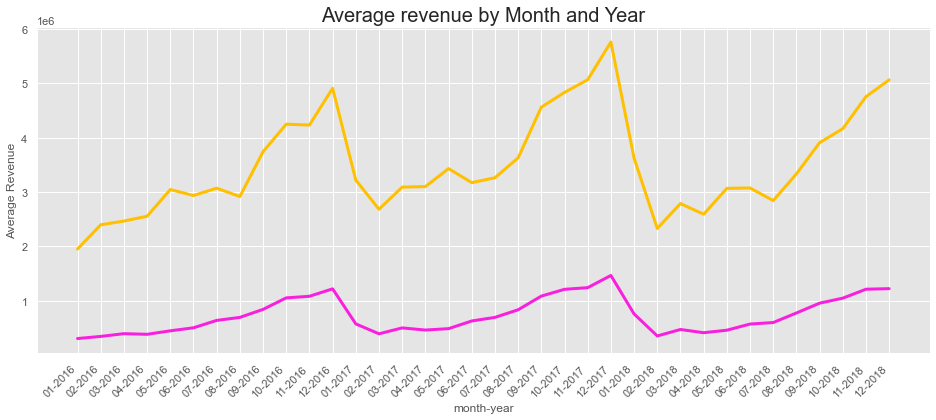

In [66]:
plt.figure(figsize=(16,6))
#Plot for pink cab customers
ax = sns.lineplot(data=per_month_df, x='month-year', y='pink_revenue', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
#Plot for yellow cab customers
sns.lineplot(data=per_month_df, x='month-year', y='yellow_revenue', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Average Revenue')
plt.title('Average revenue by Month and Year', size=20)
plt.show()

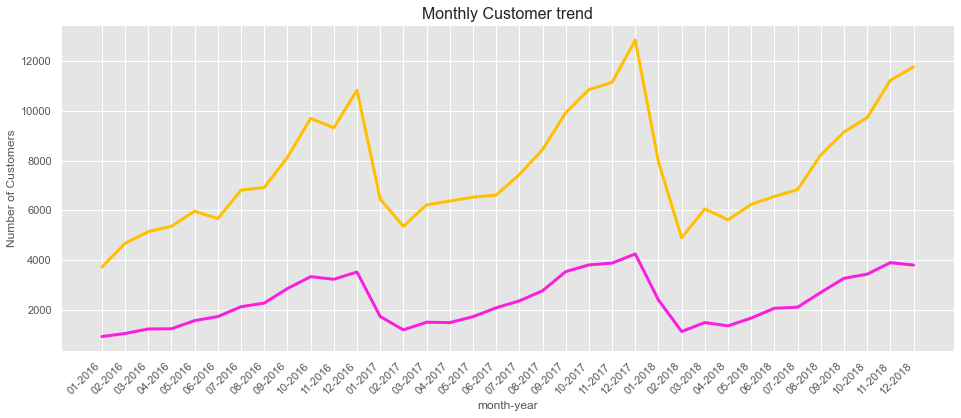

In [67]:
plt.figure(figsize=(16,6))
#Plot for pink cab customers
ax = sns.lineplot(data=per_month_df, x='month-year', y='pink_customers', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
#Plot for yellow cab customers
sns.lineplot(data=per_month_df, x='month-year', y='yellow_customers', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Number of Customers')
plt.title('Monthly Customer trend', size=16)
plt.show()

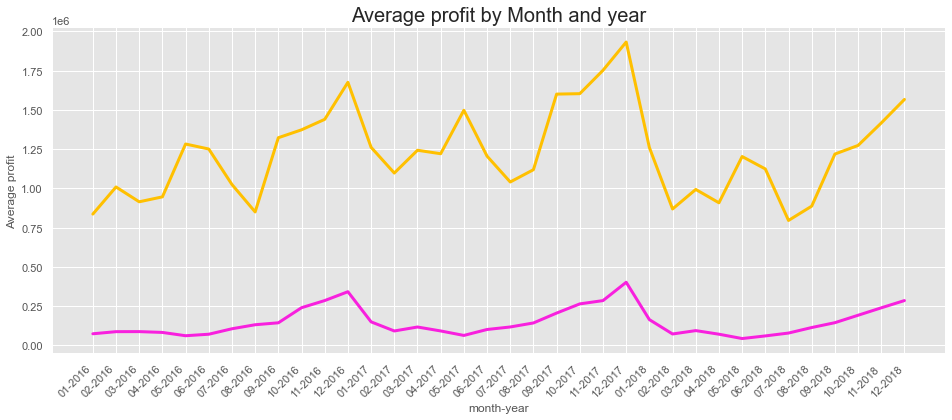

In [68]:
plt.figure(figsize=(16,6))
#Plot for pink cab customers
ax = sns.lineplot(data=per_month_df, x='month-year', y='pink_profit', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
#Plot for yellow cab customers
sns.lineplot(data=per_month_df, x='month-year', y='yellow_profit', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Average profit')
plt.title('Average profit by Month and year', size=20)
plt.show()

Text(0, 0.5, 'Number of cab users')

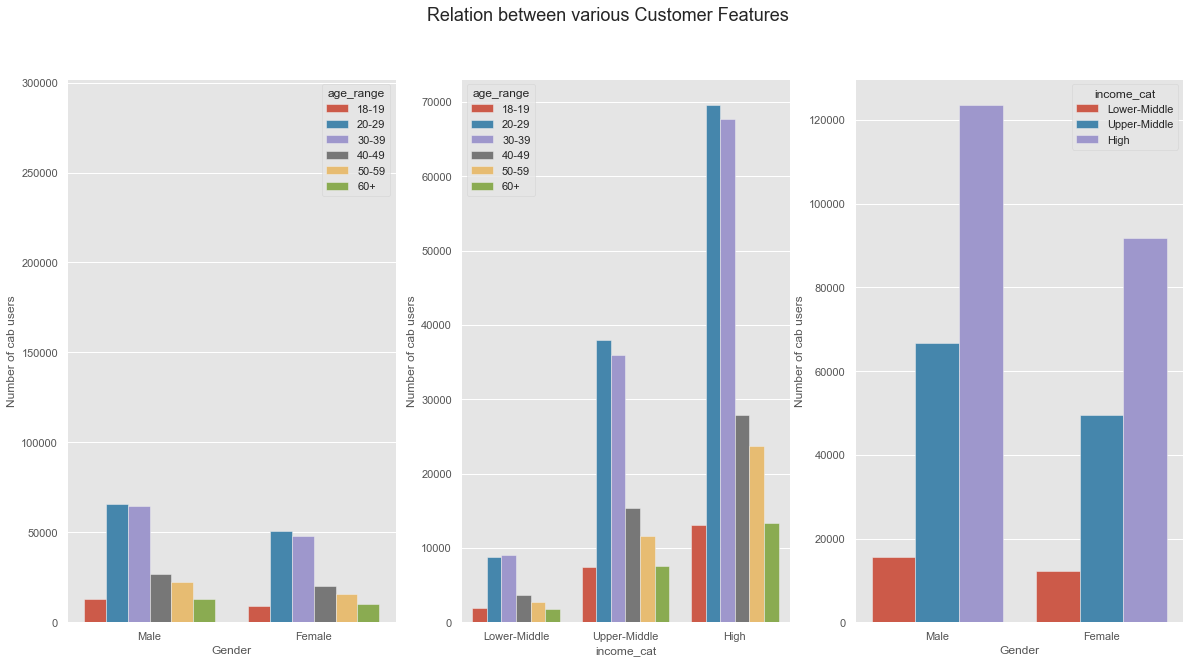

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

fig.suptitle('Relation between various Customer Features', size=18)
ax[0].set_ylim(0,city['Users'].max())
sns.countplot(data=main_df, x="Gender", hue='age_range', ax=ax[0])
sns.countplot(data=main_df, x="Gender", hue='income_cat', ax=ax[2])
sns.countplot(data=main_df, x="income_cat", hue='age_range', ax=ax[1])
ax[0].set_ylabel('Number of cab users')
ax[1].set_ylabel('Number of cab users')
ax[2].set_ylabel('Number of cab users')


#### Holiday

In [70]:
print('Average Price when there is a holiday', round(main_df[main_df.holiday == 1]['Price_per_km'].mean(),2))
print('Average Price when on a regular day', round(main_df[main_df.holiday == 0]['Price_per_km'].mean(),2))
print('Average Price when there is a holiday', round(main_df[(main_df.holiday == 1) & (main_df.day.isin(weekends)) ]['Price Charged'].mean(),2))
print('Average Price when on a regular day', round(main_df[main_df.holiday == 0]['Price Charged'].mean(),2))

Average Price when there is a holiday 12.67
Average Price when on a regular day 12.68
Average Price when there is a holiday 447.37
Average Price when on a regular day 423.21
